In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vd = pd.read_csv("Invideos.csv")
print(vd)

          video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  

In [6]:
vd.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [3]:
vd.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [10]:
vd["description"] = vd["description"].fillna(value = "This Video Has No Description")

In [11]:
vd.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description               False
dtype: bool

In [12]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [9]:
# which year was data collected
vdata = vd["trending_date"].apply(lambda x : "20"+x[:2]).value_counts().to_frame().reset_index().rename(columns = {"index":"year", "trending_date":"no_of_videos"})

<BarContainer object of 2 artists>

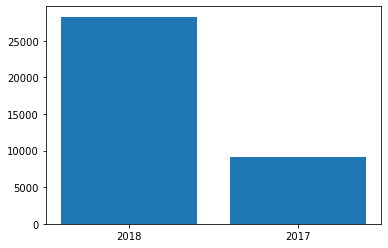

In [12]:
plt.bar(vdata["year"], vdata["no_of_videos"])

In [13]:
vd["trending_date"].apply(lambda x: "20"+x[:2]).value_counts(normalize = True)

2018    0.757469
2017    0.242531
Name: trending_date, dtype: float64

In [15]:
#description
vd.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9DDC91910>]],
      dtype=object)

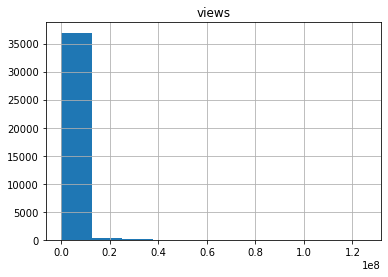

In [16]:
vd.hist("views")

In [23]:
#number of videos less than 1mil views
vd[vd["views"]<1e6]["views"].count()/vd["views"].count()*100

20.43264082244592

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9DD9E5640>]],
      dtype=object)

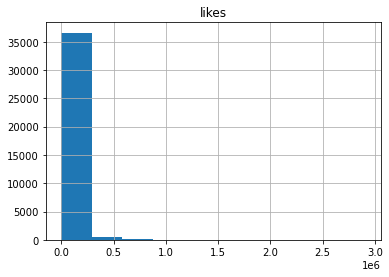

In [25]:
vd.hist("likes")

In [29]:
#percentage of videos with >50 likes

vd[vd["likes"]>50000]["likes"].count()/vd["likes"].count()*100

10.583101306489612

In [35]:
vd.describe(include = 'O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,36791
unique,16307,205,16721,1426,16339,12578,16523,13992
top,#NAME?,18.13.01,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,511,200,19,284,18,1381,16,166


In [40]:
# title length
vd["title_length"] = vd["title"].apply(lambda x :len(x))

In [42]:
vd.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'title_length'],
      dtype='object')

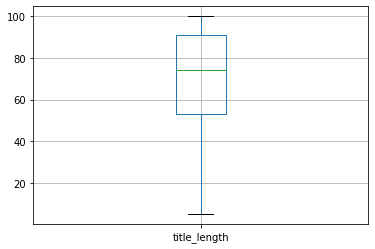

In [44]:
vd.boxplot("title_length")

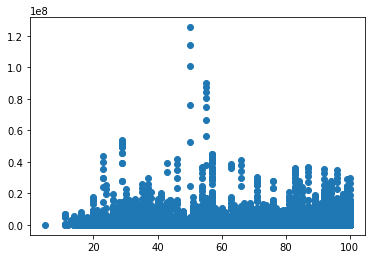

In [47]:
# is there any relation between title lengths and no of views

plt.scatter(vd["title_length"], vd["views"])

In [4]:
vd.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,0.038928,0.057953,-0.053865
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771
comments_disabled,0.038928,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132
ratings_disabled,0.057953,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508
video_error_or_removed,-0.053865,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000


In [5]:
# grouping of data based on category id

vd.groupby("category_id").sum()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,3847149504,69241553,4315081,5789446,71.0,11.0,11.0
2,30384725,539571,22284,86488,9.0,2.0,0.0
10,10150844485,254328536,15030992,17595070,7.0,8.0,0.0
15,4879743,362534,6488,42056,0.0,0.0,0.0
17,1379949159,32969986,1316379,2717679,8.0,10.0,0.0
19,1374342,16939,616,2448,0.0,0.0,0.0
20,274722506,6707728,341616,623839,0.0,0.0,0.0
22,1364104242,23194729,1728388,2661920,163.0,107.0,0.0
23,2887672070,174114686,6976508,13806968,0.0,0.0,0.0


<BarContainer object of 37352 artists>

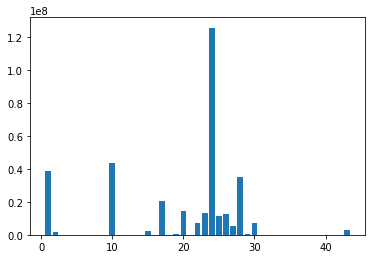

In [6]:
# which category has highest views

plt.bar(vd["category_id"], vd["views"])

<BarContainer object of 37352 artists>

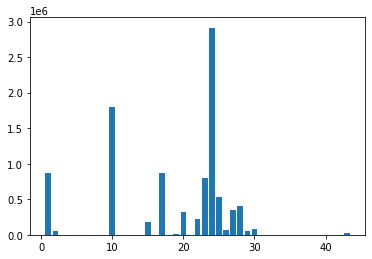

In [7]:
#which category has highes likes
plt.bar(vd["category_id"], vd["likes"])

In [8]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [9]:
# how many videos got removed or had some error

vd["video_error_or_removed"].value_counts()



False    37341
True        11
Name: video_error_or_removed, dtype: int64

In [11]:
# percentage of videos tha have comments disabled

vd["comments_disabled"].value_counts(normalize = True)

False    0.967766
True     0.032234
Name: comments_disabled, dtype: float64

In [12]:
vd["ratings_disabled"].value_counts()

False    36571
True       781
Name: ratings_disabled, dtype: int64

In [17]:
# how many videos have both comments and ratings disabled
len(vd[(vd["comments_disabled"] == True) & (vd["ratings_disabled"] == True).index])

588